# Imports

In [2]:
import pandas as pd
import numpy as np

# Reading Data in Memory

In [3]:
data_dir = 'Data/goodbooks-10k'

books_path = data_dir + '/books.csv'
ratings_path = data_dir + '/ratings.csv'
books_tag_path = data_dir + '/book_tags.csv'
tags_path = data_dir + '/tags.csv'

In [4]:
books_df = pd.read_csv(books_path)

In [5]:
ratings_df = pd.read_csv(ratings_path)

In [6]:
tags_df = pd.read_csv(tags_path)

In [7]:
book_tags_df = pd.read_csv(books_tag_path)

# Data Exploration

## Books

In [8]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [9]:
books_df.loc[books_df.book_id == 4, :]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...


In [10]:
books_df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [11]:
books_df.image_url[0]

'https://images.gr-assets.com/books/1447303603m/2767052.jpg'

In [12]:
books_df.shape

(10000, 23)

In [13]:
books_df.duplicated().sum()

0

In [14]:
books_df.isna().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [19]:
books_df.groupby('original_publication_year')['book_id'].count().mean()

34.0580204778157

We can look at the publication year to see what range the dataset covers with respect to when the books were produced. If you look at the choronologically ordered graph below, you'll notice that it is skewed to the left. The plot does not take into account the books with missing publication year but the missing publication year is a very small count, i.e just 21, a little above the average, so in the worst case (such that all the books with the missing year are from a specific year) I could be missing 21 book counts for a specific year, the distribution is aslo very skewed with book counts in several 100's making the number 21 less significant. I could manaully fill out publication year but the purpose of the exploration is to just to see how the books are spread out with respect to their publication, therefore I choose to just drop the unavailable data.

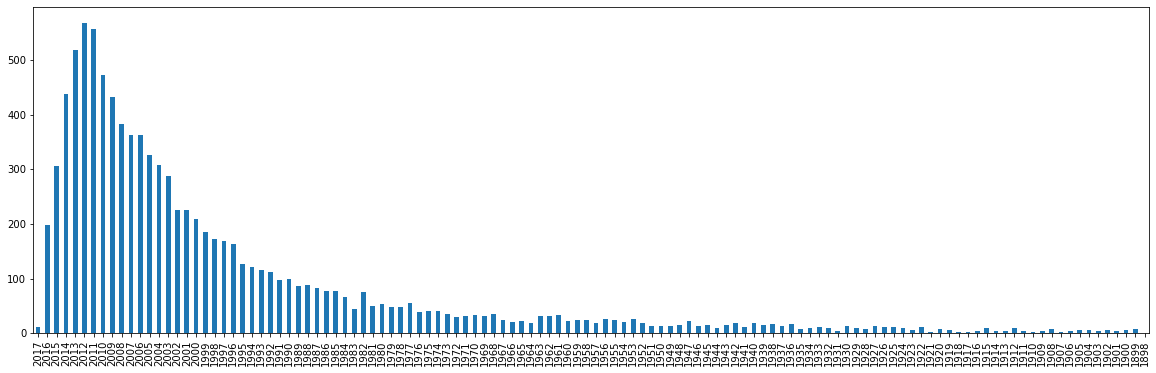

In [49]:
books_df['original_publication_year'].dropna()\
                                     .astype(int)\
                                     .value_counts()\
                                     .sort_index(ascending=False)\
                                     .head(n=120)\
                                     .plot(kind='bar', figsize=(20, 6))

In [54]:
books_df['original_publication_year'].dropna()\
                                     .astype(int)\
                                     .value_counts().head(n=30)

2012    568
2011    556
2013    518
2010    473
2014    437
2009    432
2008    383
2007    363
2006    362
2005    326
2004    307
2015    306
2003    288
2001    226
2002    225
2000    209
2016    198
1999    186
1998    172
1997    168
1996    163
1995    126
1994    121
1993    115
1992    112
1990     99
1991     98
1988     89
1989     87
1987     83
Name: original_publication_year, dtype: int64

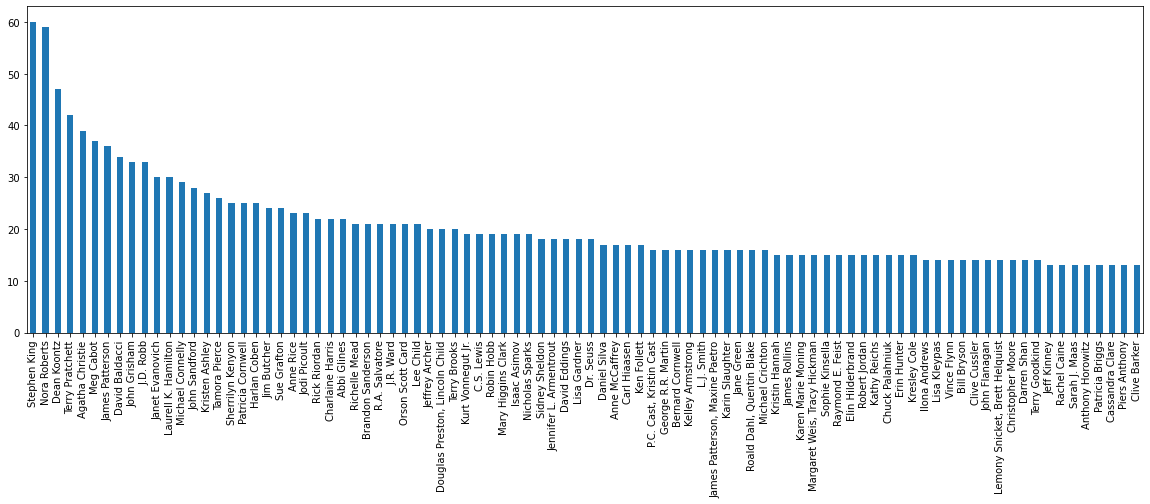

In [62]:
books_df['authors'].value_counts().head(n=90).plot(kind='bar', figsize=(20, 6))

In [66]:
books_df['authors'].value_counts().head(n=80)

Stephen King                      60
Nora Roberts                      59
Dean Koontz                       47
Terry Pratchett                   42
Agatha Christie                   39
                                  ..
Bill Bryson                       14
Clive Cussler                     14
John Flanagan                     14
Lemony Snicket, Brett Helquist    14
Christopher Moore                 14
Name: authors, Length: 80, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e833d40d0>]],
      dtype=object)

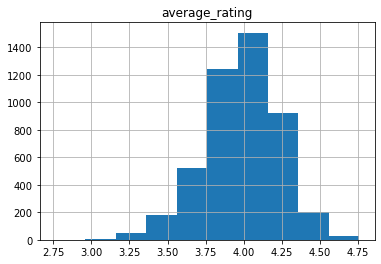

In [77]:
books_df.groupby('authors').agg({'average_rating':'mean'}).hist()

In [39]:
books_df.language_code.unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [78]:
books_df.language_code.nunique()

25

In [18]:
books_df[books_df.language_code.isin(['eng','en-US', 'en-CA', 'en-GB'])].head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


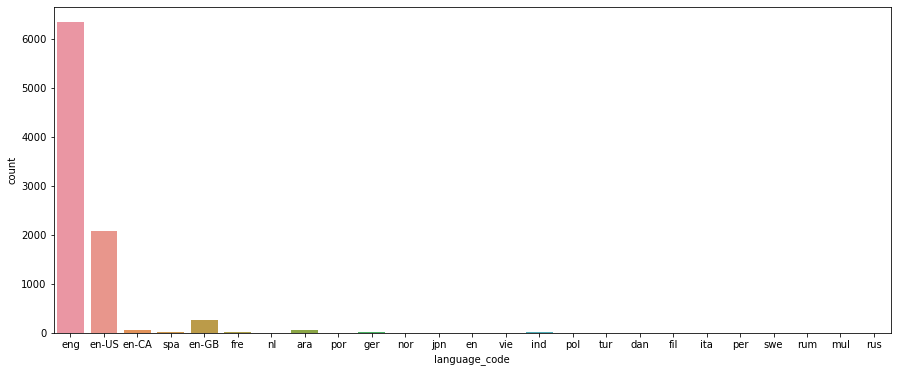

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axs = plt.subplots(1,1, figsize=(15, 6))

sns.countplot(x='language_code', data=books_df, ax=axs)

### Observation

The number of books available are 10000 with feature set such as author names, book title, original title, publication dates and image URL's.

There are few fields which have NaN's such as original_title, language code, isbn etc but we can ignore as we won't be using them.

Most of the books available are from 1992 to 2012 and the author with the largest number of books in this dataset is 'Stephen King' followed by 'Nora Roberts'.

Of the books with valid language codes, there are 25 uniques language codes and most of the books are in english.

## Ratings

In [14]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [15]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
ratings_df.describe()

,user_id,book_id,rating
count,5976479.00,5976479.00,5976479.00
mean,26224.46,2006.48,3.92
std,15413.23,2468.50,0.99
min,1.00,1.00,1.00
25%,12813.00,198.00,3.00
50%,25938.00,885.00,4.00
75%,39509.00,2973.00,5.00
max,53424.00,10000.00,5.00


In [17]:
ratings_df.user_id.nunique()

53424

In [18]:
ratings_df.book_id.nunique()

10000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e82b23bd0>]],
      dtype=object)

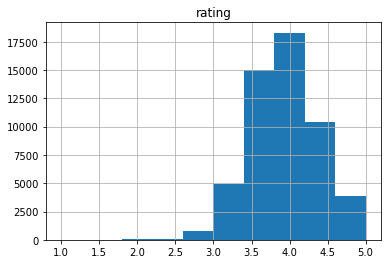

In [21]:
ratings_df.groupby('user_id').agg({'rating':'mean'}).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea0512150>]],
      dtype=object)

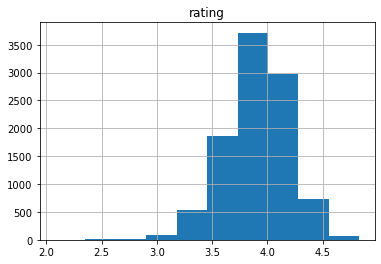

In [23]:
ratings_df.groupby('book_id').agg({'rating': 'mean'}).hist()

### Observation

There are 53424 unique users who have rated 10000 books in the range from 1 to 5. Average rating value is 3.92 for the entire ratings dataset. Looking at the histogram, pepople tends to rate in the vicinity of 4.

## Tags

In [13]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [29]:
tags_df.head(n=10)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-
6,6,--17-
7,7,--19-
8,8,--2-
9,9,--258-


In [34]:
tags_df[tags_df.tag_id==80]

,tag_id,tag_name
80,80,001-150-pages


In [24]:
tags_df.tag_id.nunique()

34252

In [25]:
tags_df.tag_name.values

array(['-', '--1-', '--10-', ..., 'Ｍａｎｇａ', 'ＳＥＲＩＥＳ', 'ｆａｖｏｕｒｉｔｅｓ'],
      dtype=object)

### Observation

I won't be using tags but instead scrap the genre related information from elsewhere.

## Creating Sub-Authors File

The code below is for creating sublist of authors that I can search online in smaller chunks for genres.

In [91]:
books_us = books_df.loc[books_df.language_code.isin(['en-US']), ['book_id','authors', 'title']]

In [92]:
authors = books_us.authors.value_counts().index

In [93]:
sub_authors_list = authors[100:200]

In [94]:
for author in sub_authors_list:
    print(author)

Anne McCaffrey
Michael  Grant
Sarah Dessen
Richard Kadrey
Glen Cook
Richard Castle
David Brin
Stephen R. Covey
Robert A. Heinlein
Iris Johansen
Nelson DeMille
Conn Iggulden
Christina Lauren
William Gibson
Clive Barker
Nalini Singh
Philippa Gregory
Mary Roach
Jeaniene Frost
Sarah Waters
Susan Elizabeth Phillips
Jasper Fforde
Piers Anthony
James Patterson, Michael Ledwidge
Jessica Day George
Amanda Hocking
Lauren Conrad
Pseudonymous Bosch, Gilbert Ford
Lynsay Sands
Sara Zarr
Michael   Lewis
Ellen Hopkins
Mercedes Lackey
A.A. Milne, Ernest H. Shepard
Seth Godin
Christopher Paolini
J.R.R. Tolkien
Sophie Jordan
Chloe Neill
L.M. Montgomery
William Shakespeare
Augusten Burroughs
Mark Cotta Vaz
Caragh M. O'Brien
Heather Brewer
Kelley Armstrong
Neal Stephenson
James A. Michener
Scott Westerfeld
Jenny Han
Sandra Brown
James Rollins
Alison Weir
J.R. Ward
Ken Follett
Cecelia Ahern
Karen Marie Moning
Amy Tan
Brent Weeks
Donald Miller
Sarah Addison Allen
Brian Jacques
Thomas L. Friedman
Alexander Mc

In [97]:
sub_books_list = books_us.loc[books_us.authors.isin(sub_authors_list), ['book_id','authors', 'title']]

In [98]:
sub_books_list

,book_id,authors,title
6,7,J.R.R. Tolkien,The Hobbit
52,53,Christopher Paolini,"Eragon (The Inheritance Cycle, #1)"
154,155,J.R.R. Tolkien,"The Two Towers (The Lord of the Rings, #2)"
160,161,J.R.R. Tolkien,"The Return of the King (The Lord of the Rings,..."
219,220,Mark Cotta Vaz,Twilight: The Complete Illustrated Movie Compa...
...,...,...,...
9925,9926,Sophie Jordan,"Hidden (Firelight, #3)"
9936,9937,Caragh M. O'Brien,"Promised (Birthmarked, #3)"
9945,9946,Thomas L. Friedman,From Beirut to Jerusalem
9950,9951,Joanne Harris,"The Girl with No Shadow (Chocolat, #2)"


In [99]:
sub_books_list.to_csv('Data/sub_authors_us_100_200.csv')

In [100]:
authors.shape

(1263,)

In [101]:
books_us.shape

(2070, 3)